**Importing Libraries**

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d ashishjangra27/malarial-cell-image

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/malarial-cell-image.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

**Data**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img

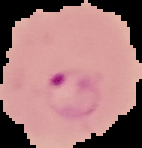

In [ ]:
load_img("/content/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")

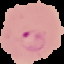

In [ ]:
load_img("/content/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png",target_size=(64,64))

In [ ]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [ ]:
image_dir="/content/Malarial Cell Image Data /cell_images/"
size=64
dataset=[]
label=[]

In [ ]:
parasitized_img = os.listdir(image_dir+"Parasitized/")
parasitized_img = parasitized_img[:3000]

for i,img_name in enumerate(parasitized_img):
  if (img_name.split('.')[1] == 'png'):
    image=cv2.imread(image_dir+"Parasitized/"+img_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((size,size))

    dataset.append(np.array(image))
    label.append(0)


In [ ]:
uninfected_img = os.listdir(image_dir+"Uninfected/")
uninfected_img = uninfected_img[:3000]
for i,img_name in enumerate(uninfected_img):
  if (img_name.split('.')[1] == 'png'):
    image=cv2.imread(image_dir+"Uninfected/"+img_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((size,size))

    dataset.append(np.array(image))
    label.append(1)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

**CNN MODEL ARCHITECTURE**

In [ ]:
INPUT_SHAPE=(size,size,3)
inp=k.Input(shape=INPUT_SHAPE)

conv1=k.Conv2D(32, kernel_size=(3,3), activation='relu', padding="same")(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32, kernel_size=(3,3), activation='relu', padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512, activation='relu')(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256, activation='relu')(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2, activation='sigmoid')(drop4)



In [ ]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248

In [ ]:
history=model.fit(np.array(xtrain),ytrain,batch_size=64,verbose=1,epochs=5,validation_split=0.1,shuffle=False)

Epoch 1/5
68/68 [==============================] - 32s 431ms/step - loss: 0.8211 - accuracy: 0.6302 - val_loss: 6.0209 - val_accuracy: 0.4979
Epoch 2/5
68/68 [==============================] - 29s 424ms/step - loss: 0.6021 - accuracy: 0.7068 - val_loss: 1.6645 - val_accuracy: 0.5479
Epoch 3/5
68/68 [==============================] - 30s 446ms/step - loss: 0.5095 - accuracy: 0.7541 - val_loss: 0.9801 - val_accuracy: 0.6125
Epoch 4/5
68/68 [==============================] - 29s 420ms/step - loss: 0.4234 - accuracy: 0.8073 - val_loss: 0.7673 - val_accuracy: 0.6458
Epoch 5/5
68/68 [==============================] - 29s 421ms/step - loss: 0.3070 - accuracy: 0.8659 - val_loss: 4.0393 - val_accuracy: 0.5167


In [ ]:
print("Test_Acuuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

38/38 [==============================] - 2s 52ms/step - loss: 3.7732 - accuracy: 0.5400
Test_Acuuracy: 54.00%


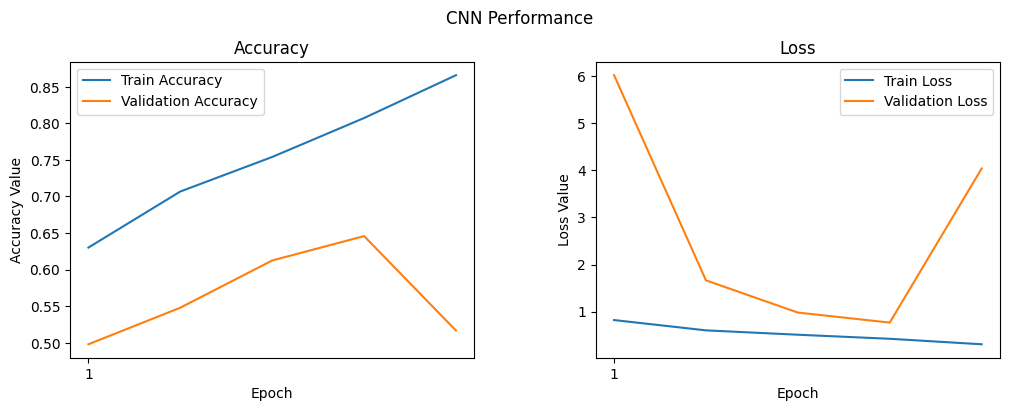

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'history' defined before this code snippet
# Assuming history is a Keras History object

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1, max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

plt.show()
